In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%inline matplotlib


UsageError: Line magic function `%inline` not found.


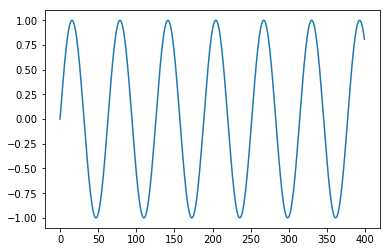

In [6]:
time        = np.arange(0, 40, 0.1);
# Amplitude of the sine wave is sine of a variable like time
amplitude   = np.sin(time)
_ = plt.plot(amplitude)
plt.show()

In [7]:
print(amplitude)

[ 0.00000000e+00  9.98334166e-02  1.98669331e-01  2.95520207e-01
  3.89418342e-01  4.79425539e-01  5.64642473e-01  6.44217687e-01
  7.17356091e-01  7.83326910e-01  8.41470985e-01  8.91207360e-01
  9.32039086e-01  9.63558185e-01  9.85449730e-01  9.97494987e-01
  9.99573603e-01  9.91664810e-01  9.73847631e-01  9.46300088e-01
  9.09297427e-01  8.63209367e-01  8.08496404e-01  7.45705212e-01
  6.75463181e-01  5.98472144e-01  5.15501372e-01  4.27379880e-01
  3.34988150e-01  2.39249329e-01  1.41120008e-01  4.15806624e-02
 -5.83741434e-02 -1.57745694e-01 -2.55541102e-01 -3.50783228e-01
 -4.42520443e-01 -5.29836141e-01 -6.11857891e-01 -6.87766159e-01
 -7.56802495e-01 -8.18277111e-01 -8.71575772e-01 -9.16165937e-01
 -9.51602074e-01 -9.77530118e-01 -9.93691004e-01 -9.99923258e-01
 -9.96164609e-01 -9.82452613e-01 -9.58924275e-01 -9.25814682e-01
 -8.83454656e-01 -8.32267442e-01 -7.72764488e-01 -7.05540326e-01
 -6.31266638e-01 -5.50685543e-01 -4.64602179e-01 -3.73876665e-01
 -2.79415498e-01 -1.82162

In [19]:
# batch, sequence_len, dimension
# dimension : 1 
batch = 1 
sequence_len = 20

def convert_to_train(dataset, batch_size, sequence_len, dimension):
    total_len = dataset.shape[0]
    temp = []
    for i in range(total_len-sequence_len) :
        temp.append(dataset[i:i+sequence_len].reshape(-1,dimension))
    temp = np.array(temp)
    return temp 

train_set = convert_to_train(amplitude, 1, 10, 1)
print(train_set)
print(train_set.shape)

[[[0.        ]
  [0.09983342]
  [0.19866933]
  ...
  [0.64421769]
  [0.71735609]
  [0.78332691]]

 [[0.09983342]
  [0.19866933]
  [0.29552021]
  ...
  [0.71735609]
  [0.78332691]
  [0.84147098]]

 [[0.19866933]
  [0.29552021]
  [0.38941834]
  ...
  [0.78332691]
  [0.84147098]
  [0.89120736]]

 ...

 [[0.84195053]
  [0.89160987]
  [0.93236055]
  ...
  [0.99154999]
  [0.97364546]
  [0.94601258]]

 [[0.89160987]
  [0.93236055]
  [0.96379539]
  ...
  [0.97364546]
  [0.94601258]
  [0.90892746]]

 [[0.93236055]
  [0.96379539]
  [0.9856003 ]
  ...
  [0.94601258]
  [0.90892746]
  [0.86276064]]]
(390, 10, 1)


In [20]:
class CasualConv(tf.keras.Model):
    def __init__(self, **kwargs):
        super(CasualConv, self).__init__()
        self.conv = tf.keras.layers.Conv1D(filters=1, kernel_size=3, padding='causal')
        
    def call(self, x):
        return self.conv(x)

In [24]:
cv = CasualConv()
output = cv(train_set)

In [25]:
print(output)

tf.Tensor(
[[[ 0.        ]
  [-0.03215722]
  [-0.15255921]
  ...
  [-0.34107108]
  [-0.36992755]
  [-0.39508782]]

 [[-0.03215722]
  [-0.15255921]
  [-0.1949409 ]
  ...
  [-0.36992755]
  [-0.39508782]
  [-0.4163005 ]]

 [[-0.06399314]
  [-0.27143687]
  [-0.2353748 ]
  ...
  [-0.39508782]
  [-0.4163005 ]
  [-0.43335365]]

 ...

 [[-0.27119968]
  [-1.03412211]
  [-0.44617005]
  ...
  [-0.44175929]
  [-0.42737268]
  [-0.4087159 ]]

 [[-0.2871954 ]
  [-1.09130298]
  [-0.4543962 ]
  ...
  [-0.42737268]
  [-0.4087159 ]
  [-0.38597537]]

 [[-0.30032155]
  [-1.13757991]
  [-0.45808217]
  ...
  [-0.4087159 ]
  [-0.38597537]
  [-0.3593783 ]]], shape=(390, 10, 1), dtype=float64)


In [ ]:
# 1st : causal : dialted = 0 
# 2st and more : dialated = n 2^n 
